# mTSP

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from dopt import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Сформируем игровой датасет

In [2]:
import sklearn.datasets
np.random.seed(10)
m = 300 # число точек в выборке (пунктов)
xs, labels = sklearn.datasets.make_blobs(n_samples=m, centers=10, cluster_std=3.0)
perm = np.random.permutation(xs.shape[0])

In [3]:
from scipy.spatial.distance import cdist
# матрица попарных расстояний
Dist = cdist(xs, xs)

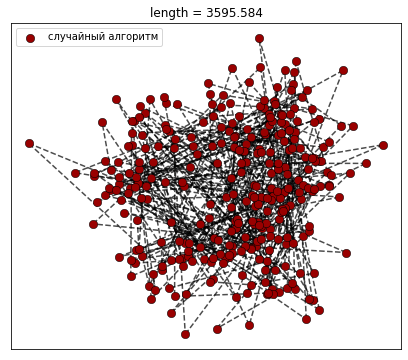

In [4]:
# отрисовка
draw_perm(xs, Dist, perm, name='случайный алгоритм', col='#990000')

# жадный алгоритм

CPU times: user 4.13 s, sys: 42.8 ms, total: 4.17 s
Wall time: 3.97 s


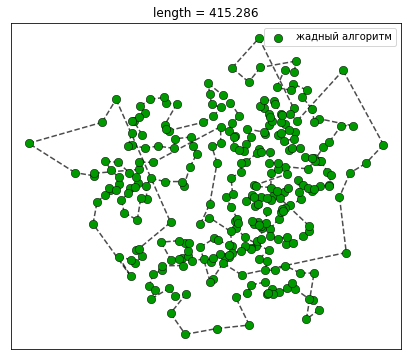

In [5]:
%%time
# запустить жадный алгоритм из каждой точки
hs = [f_sumdists(Dist, get_greedy(Dist, i)) for i in range(m)]
# выбрать лучший
gperm = get_greedy(Dist, np.argmin(hs))
# отрисовка
draw_perm(xs, Dist, gperm, name='жадный алгоритм', col='#009900')

# Метод отжига

In [6]:
%%time
# запускаем и смотрим качество
np.random.seed(11)
init = randomcycle(m)
steps, steps_f1, steps_f2, a_ = run_anneal(lambda x: f_sumdists(Dist, x), g_change, init, n_steps=100000)
aperm = steps[np.argmin(steps_f1)]

CPU times: user 27.5 s, sys: 196 ms, total: 27.7 s
Wall time: 27.8 s


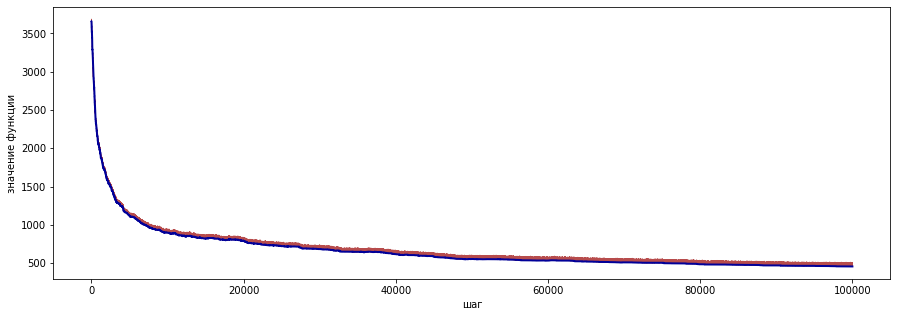

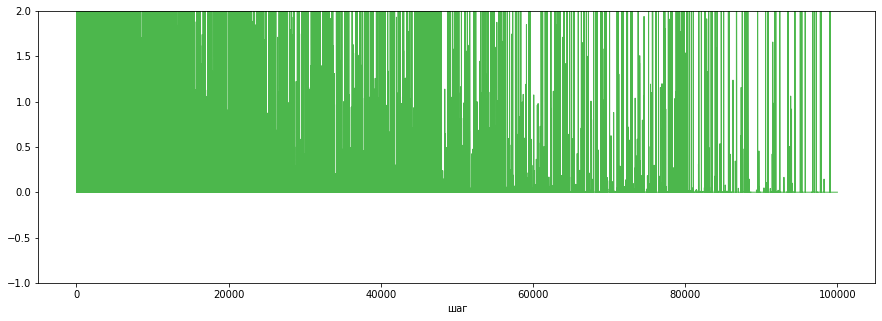

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(steps_f2, c='#990000', lw=1, alpha=0.7, zorder=1)
plt.plot(steps_f1, c='#000099', lw=2)
plt.xlabel('шаг')
plt.ylabel('значение функции')
plt.figure(figsize=(15, 5))
plt.plot(a_, c='#009900', lw=1, alpha=0.7, zorder=1)
plt.ylim([-1,2 ])
plt.xlabel('шаг');

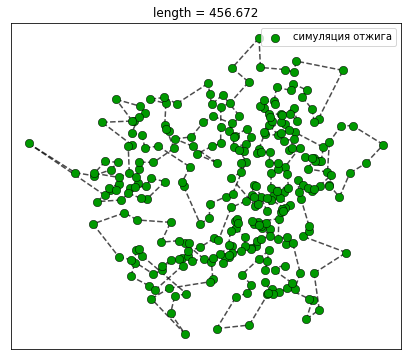

In [8]:
# отрисовка
draw_perm(xs, Dist, aperm, name='симуляция отжига', col='#009900')